1. Loading and Exploring the Dataset:

In [ ]:
import pandas as pd
dataset=pd.read_csv('Titanic-Dataset.csv')
dataset.head(3)
dataset.dtypes
dataset.index
dataset.shape

(891, 12)

2. Data Cleaning:

In [ ]:
# Identifying null values
dataset.isnull().sum()
(dataset.isnull().sum()/dataset.shape[0])*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
#Identifying total percentage of null data
(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

np.float64(8.099513655069211)

In [ ]:
# dropping Cabin
dataset.drop(columns='Cabin',inplace =True)
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Filling Age with mean and Embarked with mode
dataset['Age'].fillna(dataset['Age'].mean(),inplace=True)
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

<ipython-input-90-51f3b68bedd8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].mean(),inplace=True)
<ipython-input-90-51f3b68bedd8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
# Identifying duplicates
dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [ ]:
#Dropping duplicate data
dataset.drop_duplicates(inplace=True)

Creating boxplots to detect outliers in 'Age' and 'Fare' columns





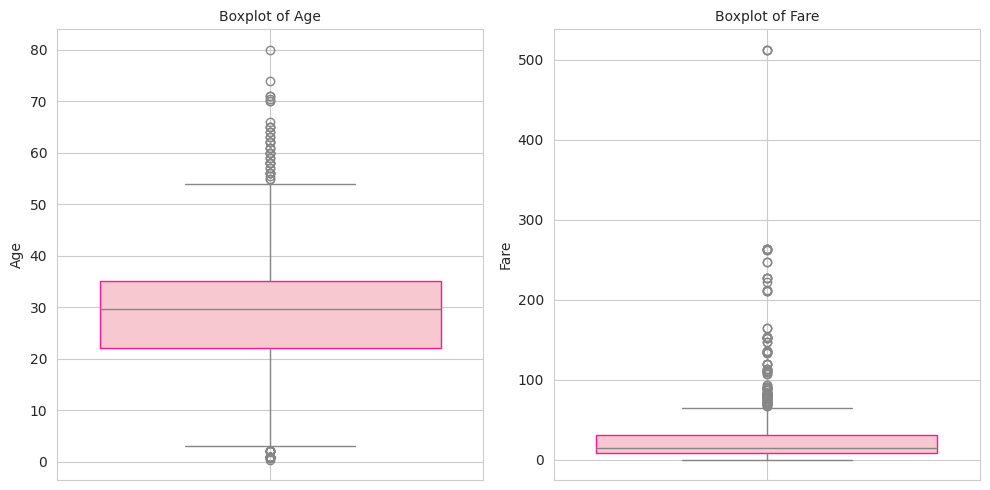

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# First Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=dataset, color='pink', boxprops=dict(edgecolor='deeppink'))
plt.title('Boxplot of Age', fontsize=10)
plt.ylabel('Age', fontsize=10)
plt.grid(True)

# Second Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=dataset, color='pink', boxprops=dict(edgecolor='deeppink'))
plt.title('Boxplot of Fare', fontsize=10)
plt.ylabel('Fare', fontsize=10)
plt.grid(True)

# Adjusting spacing and showing plot
plt.tight_layout()
plt.show()


Calculating IQR and removing outliers from the 'Age' column

In [ ]:
q1 = dataset['Age'].quantile(0.25)
q3 = dataset['Age'].quantile(0.75)
iqr = q3 - q1
min_range = q1 - (1.5 * iqr)
max_range = q3 + (1.5 * iqr)
dataset = dataset[(dataset['Age'] >= min_range) & (dataset['Age'] <= max_range)]

Calculating IQR and removing outliers from the 'Fare' column

In [ ]:
q1 = dataset['Fare'].quantile(0.25)
q3 = dataset['Fare'].quantile(0.75)
iqr = q3 - q1
min_range = q1 - (1.5 * iqr)
max_range = q3 + (1.5 * iqr)
dataset = dataset[(dataset['Fare'] >= min_range) & (dataset['Fare'] <= max_range)]

Re-plotting boxplots after removing outliers

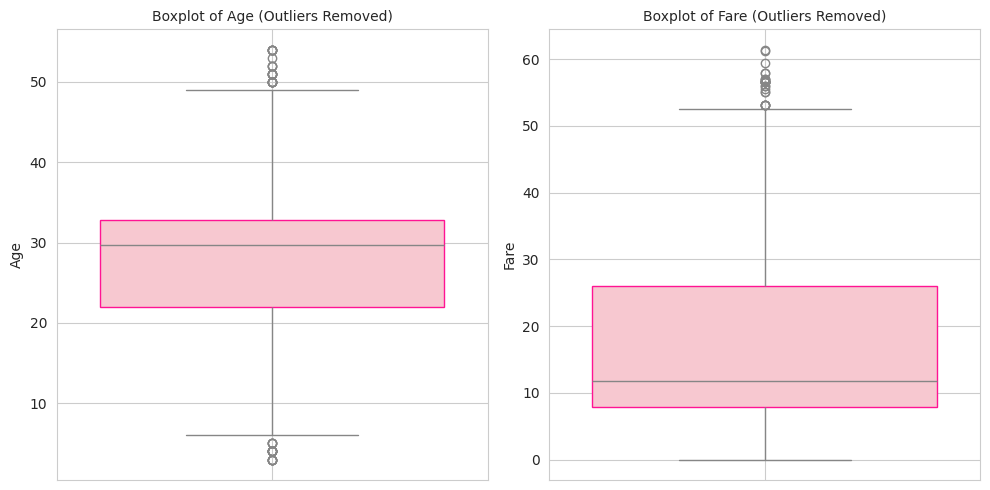

In [ ]:
plt.figure(figsize=(10, 5))

# First Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=dataset, color='pink', boxprops=dict(edgecolor='deeppink'))
plt.title('Boxplot of Age (Outliers Removed)', fontsize=10)
plt.ylabel('Age', fontsize=10)
plt.grid(True)

# Second Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=dataset, color='pink', boxprops=dict(edgecolor='deeppink'))
plt.title('Boxplot of Fare (Outliers Removed)', fontsize=10)
plt.ylabel('Fare', fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()


3. Visualizations:

<ipython-input-97-7739e2cc5ad6>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


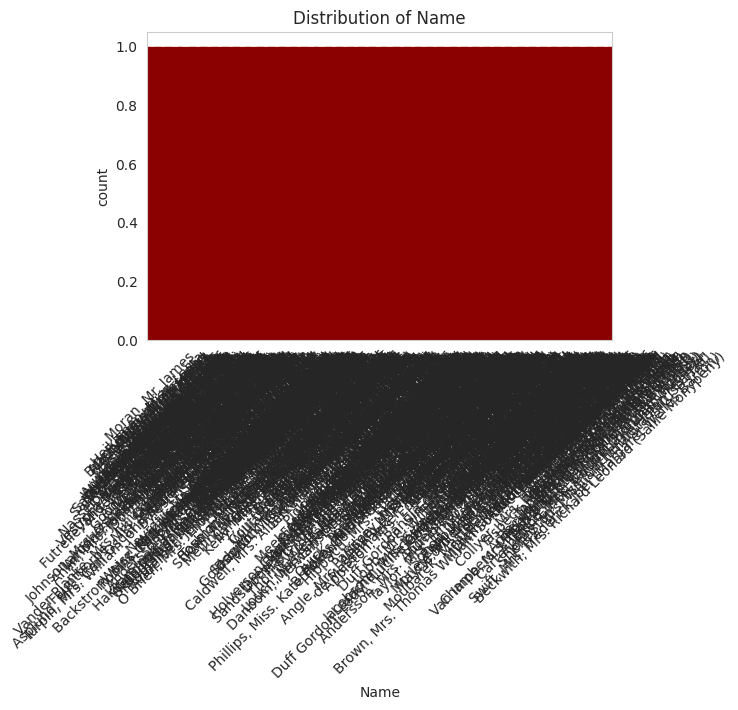

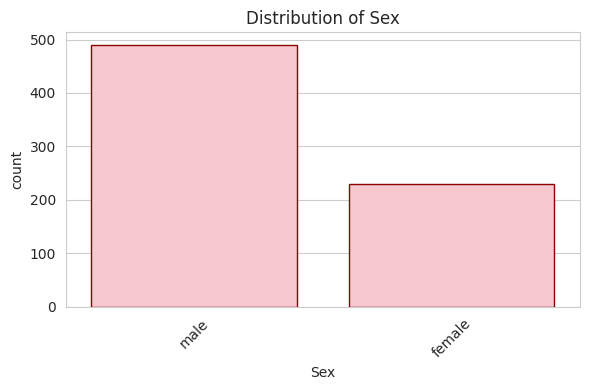

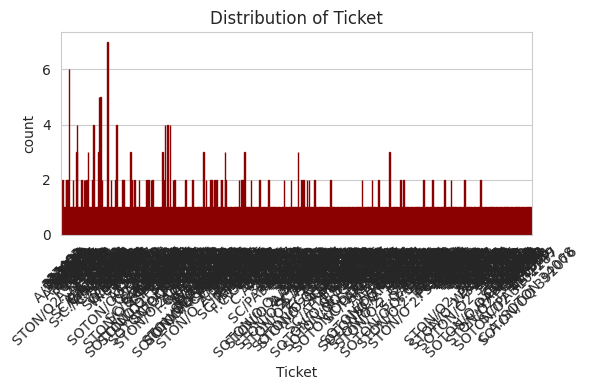

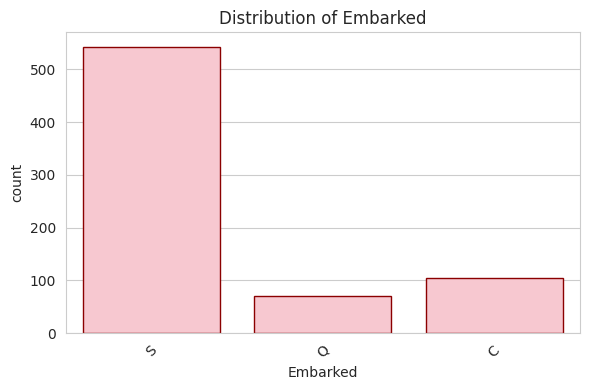

In [ ]:
#1. Bar charts for categorical variables
categorical_var = dataset.select_dtypes(include=['object', 'category']).columns

for col in categorical_var:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=dataset, color='pink', edgecolor='darkred')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


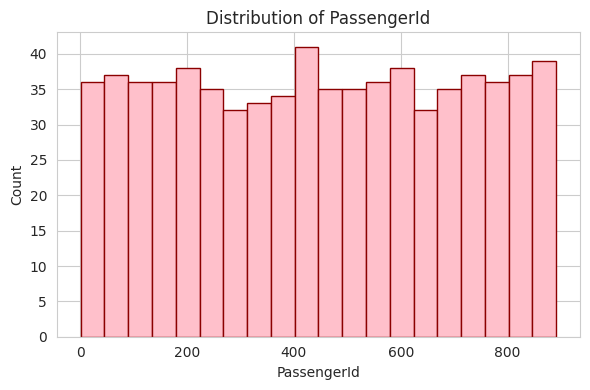

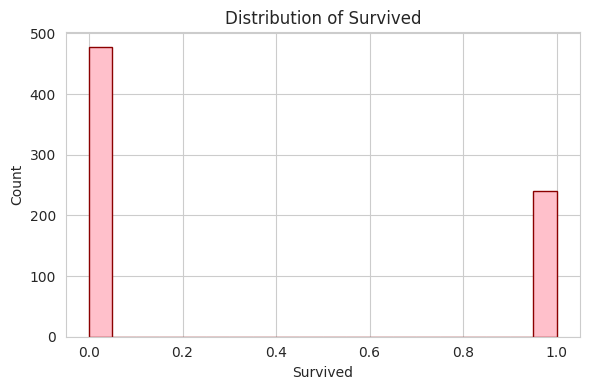

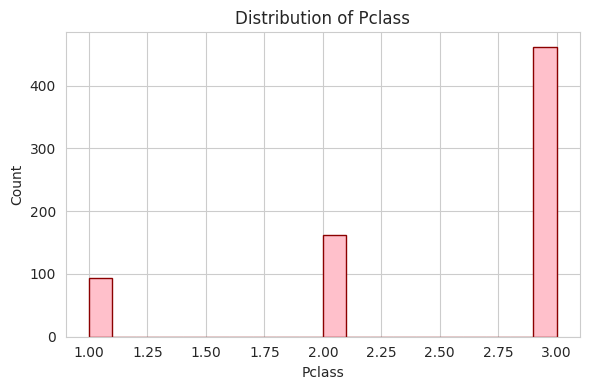

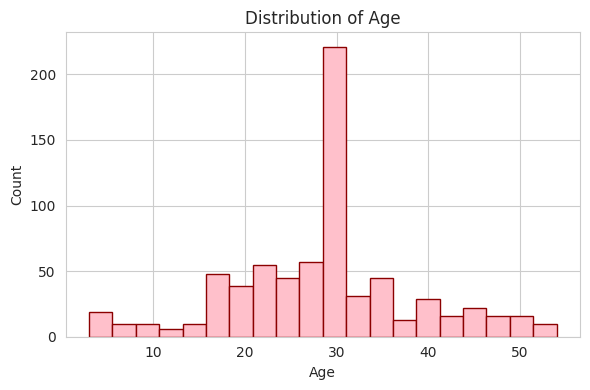

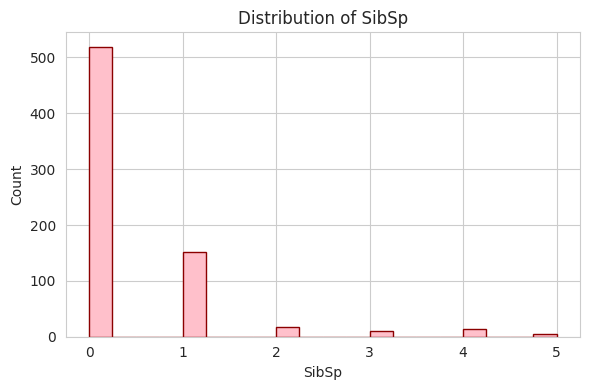

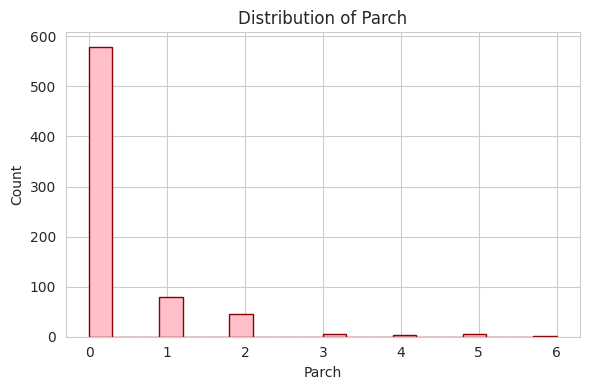

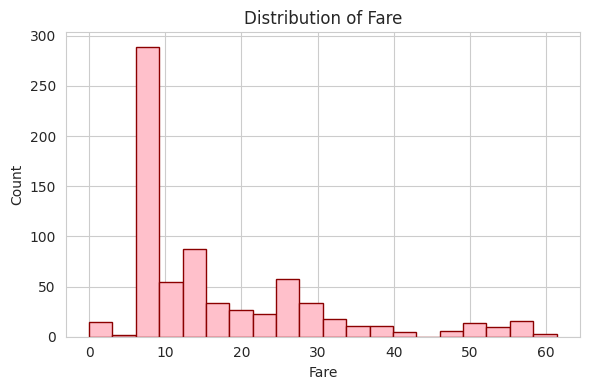

In [ ]:
#2. Histograms for numeric distributions
numeric_distribution = dataset.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_distribution:
    plt.figure(figsize=(6, 4))
    dataset[col].hist(bins=20, color='pink', edgecolor='darkred')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

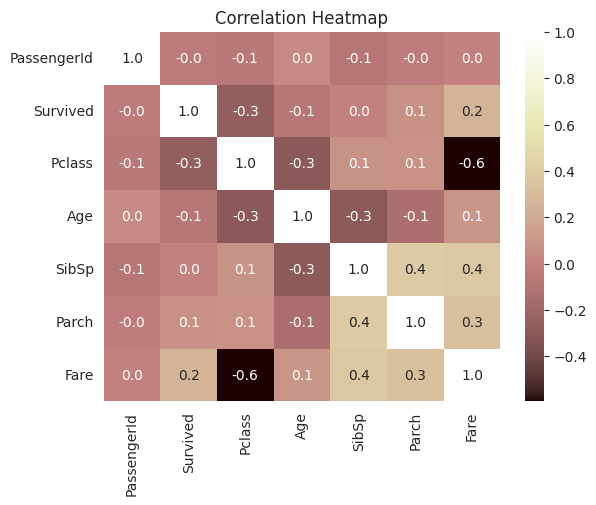

In [ ]:
#3. correlation heatmap for numeric features
import numpy as np

numeric_features = dataset.select_dtypes(include=[np.number])
correlation = numeric_features.corr()
sns.heatmap(correlation, annot=True, cmap='pink', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()


 Summary of Titanic Dataset EDA

**Dataset Overview:**

Loaded the Titanic dataset with 891 rows and 12 relevant columns after cleaning.

Columns include passenger details such as Age, Fare, Sex, Pclass, etc.

**Data Cleaning:**

Removed the Cabin column due to a high percentage of missing values.

Imputed missing Age values with the mean and Embarked values with the mode.

Removed all duplicate records.

Handled outliers in Age and Fare using the IQR method.

**Visual Insights:**

Gender and Survival:

Females had a much higher survival rate (≈69%) compared to males (≈17%).

Passenger Class and Survival:

Survival rate was highest in 1st class (≈56%) and lowest in 3rd class (≈24%).

Age Distribution:

Most passengers were between 20 and 40 years old.

Fare Insights:

A few passengers paid extremely high fares. Outliers were removed to normalize the distribution.

Correlation Analysis:

Fare and Pclass showed a moderate negative correlation, meaning passengers in higher classes generally paid more.

Other correlations were relatively weak.

**Overall Observations:**

Being female and/or in a higher class increased survival chances significantly.

Visualizations helped identify skewed distributions and outliers.

Cleaned dataset is now ready for further modeling or hypothesis testing.